In [82]:
import numpy as np
import pandas as pd
from tesser import bic
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import itertools
import glob, os

In [2]:
models = {}
files = [file for file in glob.glob("./Data/results/*.csv")] #grabs files from folder
for file in files:
    name = file[15:-4].lower()

    n = 42
    results =pd.read_csv(file)
    l = list(results.columns)
    l.remove('subject')
    l.remove('log_like')
    k =len(l)
    if 'only'  in name:
        k = k-1
    if 'fixed'  in name:
        k = k-1


    
    bic_array = bic.get_bic(results, k , n, True)
    model_bic = bic.get_bic(results, k , n, False)
    d = bic.params(results, False)

    avgs = np.array([x for x in d.values()])
    param = [x for x in d.keys()]
    full = np.append(avgs,model_bic)
    models[name] = full

param.append( 'BIC')

In [3]:
param

['gamma', 'alpha', 'tau', 'log_like', 'BIC']

In [5]:
pd.DataFrame.from_dict(models)

,hybrid_community,hybrid_community_weighted,hybrid_sr_fixed_0.0_weighted,hybrid_sr_fixed_0.9,hybrid_sr_free,hybrid_sr_free_weighted,hybrid_transition_weighted,_community_only,_sr_only
0,0.643586,0.541442,0.771073,0.584925,0.620065,0.681027,0.776892,0.583890,0.605664
1,0.670954,0.604529,0.480253,0.480150,0.490901,0.476033,0.574640,0.490908,0.480418
2,1.997400,1.148633,1.029802,1.301543,1.277954,0.333038,0.729846,5.285527,1.596445
3,-25.839584,-24.518404,-25.500696,-26.235968,-26.255165,-24.816652,-25.122768,-27.064583,-26.229588
4,2999.720161,3445.748354,3518.437924,3029.052585,3302.370921,3739.716412,3490.471289,2818.472338,2756.682742


In [7]:
df =pd.DataFrame(data = models.values(),  columns = param)
df['w_BIC'] = bic.wbic(df.BIC, axis=0)
df.index = models.keys()
df

,gamma,alpha,tau,log_like,BIC,w_BIC
hybrid_community,0.643586,0.670954,1.997400,-25.839584,2999.720161,1.679171e-53
hybrid_community_weighted,0.541442,0.604529,1.148633,-24.518404,3445.748354,2.351275e-150
hybrid_sr_fixed_0.0_weighted,0.771073,0.480253,1.029802,-25.500696,3518.437924,3.863348e-166
hybrid_sr_fixed_0.9,0.584925,0.480150,1.301543,-26.235968,3029.052585,7.171994e-60
hybrid_sr_free,0.620065,0.490901,1.277954,-26.255165,3302.370921,3.201233e-119
hybrid_sr_free_weighted,0.681027,0.476033,0.333038,-24.816652,3739.716412,3.443108e-214
hybrid_transition_weighted,0.776892,0.574640,0.729846,-25.122768,3490.471289,4.569213e-160
_community_only,0.583890,0.490908,5.285527,-27.064583,2818.472338,3.824367e-14
_sr_only,0.605664,0.480418,1.596445,-26.229588,2756.682742,1.000000e+00


In [61]:
names = list(df.columns)
names

['gamma', 'alpha', 'tau', 'log_like', 'BIC', 'w_BIC']

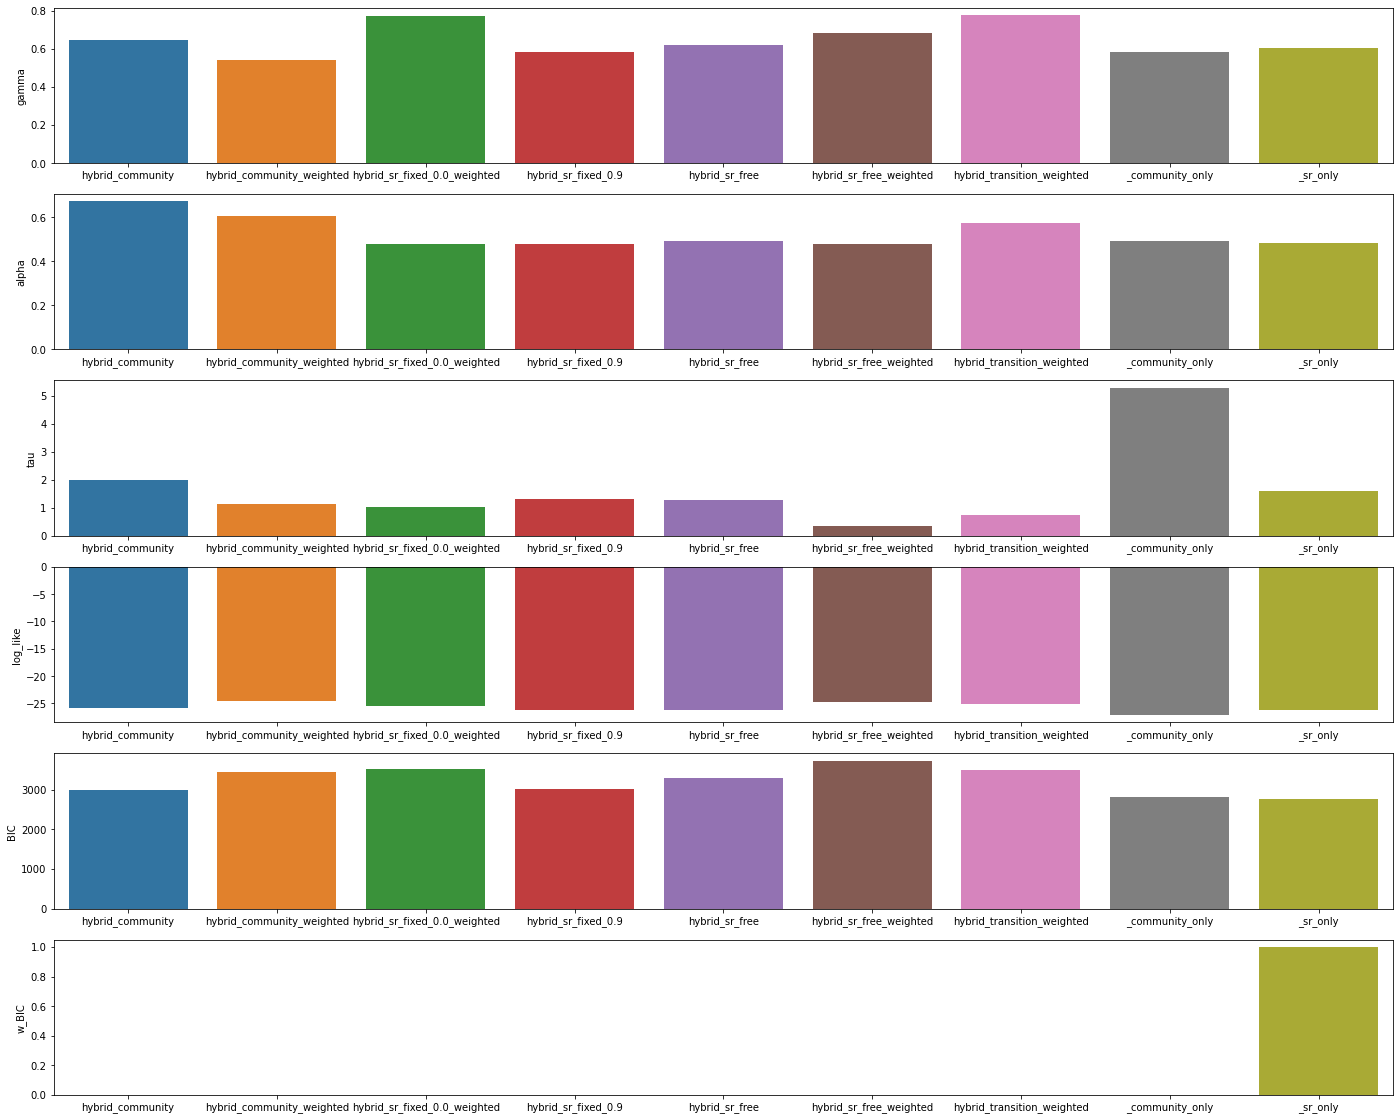

In [124]:
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(24,20))

for ax, n in zip(axes.flatten(), names):
    sns.barplot(x=df.index, y=df[n], data=df, ci = 'sd', ax=ax)


In [93]:
files

['./Data/results/hybrid_community.csv',
 './Data/results/hybrid_community_weighted.csv',
 './Data/results/hybrid_SR_fixed_0.0_weighted.csv',
 './Data/results/hybrid_SR_fixed_0.9.csv',
 './Data/results/hybrid_SR_free.csv',
 './Data/results/hybrid_SR_free_weighted.csv',
 './Data/results/hybrid_transition_weighted.csv',
 './Data/results/_community_only.csv',
 './Data/results/_sr_only.csv']

Text(27.0, 0.5, 'hybrid_community_weighted')

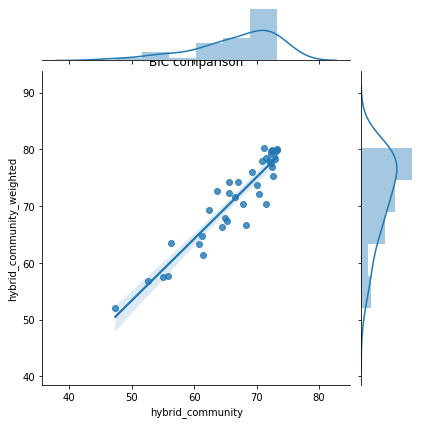

In [113]:

r0 =pd.read_csv(files[0])
r1 =pd.read_csv(files[1])
n = 42
data0 = bic.get_bic(r0,n=n,k=4,all_log=True)
data1 = bic.get_bic(r1,n=n,k=6,all_log=True)
# data0 = bic.wbic(data0, axis=0)
# data1 = bic.wbic(data1, axis=0)
name1 = files[0][15:-4].lower()
name2 = files[1][15:-4].lower()
# print(data0)

sns.jointplot(data0['log_like'], data1['log_like'], kind='reg');

plt.title('BIC comparison')
plt.xlabel(name1)
plt.ylabel(name2)


Text(27.0, 0.5, 'hybrid_sr_free_weighted')

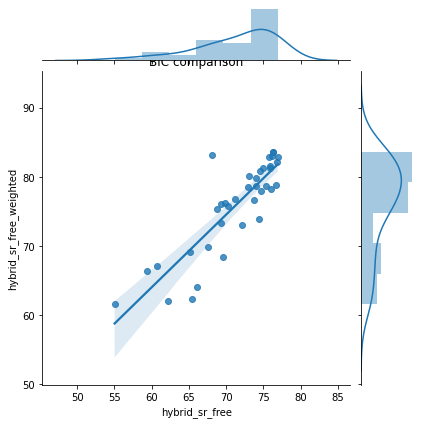

In [117]:

r0 =pd.read_csv(files[4])
r1 =pd.read_csv(files[5])
n = 42
data0 = bic.get_bic(r0,n=n,k=5,all_log=True)
data1 = bic.get_bic(r1,n=n,k=7,all_log=True)
# data0 = bic.wbic(data0, axis=0)
# data1 = bic.wbic(data1, axis=0)
name1 = files[4][15:-4].lower()
name2 = files[5][15:-4].lower()
# print(data0)

sns.jointplot(data0['log_like'], data1['log_like'], kind='reg');

plt.title('BIC comparison')
plt.xlabel(name1)
plt.ylabel(name2)
